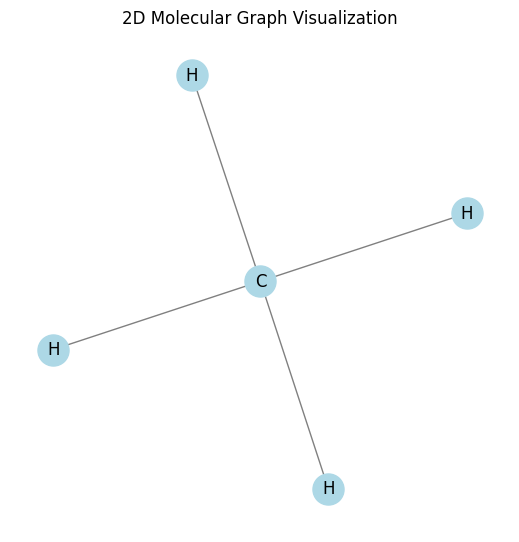

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import QM9
from torch_geometric.utils import to_networkx

from constants import Z_TO_ELEMENT


# Load QM9 dataset
dataset = QM9(root='data/QM9')

# Select a molecule
data = dataset[0]

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

atomic_numbers = data.x[:, 5].tolist()
elements = {indx: Z_TO_ELEMENT[z] for indx, z in enumerate(atomic_numbers)}

# Draw the molecular graph
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, labels=elements, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("2D Molecular Graph Visualization")
plt.show()

In [3]:
data.y

tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]])

In [77]:
import py3Dmol


# Load QM9 dataset
dataset = QM9(root='data/QM9')

# Select a molecule
data = dataset[0]

# Atomic numbers are stored in the 6th column of the node features (x)
atomic_numbers = data.x[:, 5].tolist()
# I convert them to element symbols with my periodic table dictionary
atoms_labels_list = [Z_TO_ELEMENT[z] for z in atomic_numbers]
# Get the 3D coordinates of the atoms
coordinates = data.pos

# Create a 3Dmol view
view = py3Dmol.view(width=800, height=400)

# Add atoms to the view
xyz_str = f"""
{len(atoms_labels_list)}
my lovely molecule
"""
for i, atom in enumerate(atoms_labels_list):
    x, y, z = coordinates[i]
    xyz_str += f"{atom} {x:.3f} {y:.3f} {z:.3f}\n"

# Print out the XYZ string to verify the format
print(xyz_str)

# Add model in XYZ format
view.addModel(xyz_str, "xyz")

# Set the style
view.setStyle({'stick': {}})

# Show the 3D plot
view.show()


5
my lovely molecule
C -0.013 1.086 0.008
H 0.002 -0.006 0.002
H 1.012 1.464 0.000
H -0.541 1.447 -0.877
H -0.524 1.438 0.906



3Dmol.js failed to load for some reason. Please check your browser console for error messages.